# Two Way Tables

Contents

    Creating a Table from Data
    Creating a Table Directly
    Tools For Working With Tables
    Graphical Views of Tables

Here we look at some examples of how to work with two way tables. We assume that you can enter data and understand the different data types.

## Creating a Table from Data

We first look at how to create a table from raw data. Here we use a fictitious data set, smoker.csv. This data set was created only to be used as an example, and the numbers were created to match an example from a text book, p. 629 of the 4th edition of Moore and McCabe’s Introduction to the Practice of Statistics. You should look at the data set in a spreadsheet to see how it is entered. The information is ordered in a way to make it easier to figure out what information is in the data.

The idea is that 356 people have been polled on their smoking status (Smoke) and their socioeconomic status (SES). For each person it was determined whether or not they are current smokers, former smokers, or have never smoked. Also, for each person their socioeconomic status was determined (low, middle, or high). The data file contains only two columns, and when read R interprets them both as factors:

In [1]:
smokerData <- read.csv(file='smoker.csv',sep=',',header=T)
summary(smokerData)

     Smoke         SES     
 current:116   High  :211  
 former :141   Low   : 93  
 never  : 99   Middle: 52  

You can create a two way table of occurrences using the table command and the two columns in the data frame:

In [2]:
smoke <- table(smokerData$Smoke,smokerData$SES)
smoke

         
          High Low Middle
  current   51  43     22
  former    92  28     21
  never     68  22      9

In this example, there are 51 people who are current smokers and are in the high SES. Note that it is assumed that the two lists given in the table command are both factors. 

##  Creating a Table Directly

Sometimes you are given data in the form of a table and would like to create a table. Here we examine how to create the table directly. Unfortunately, this is not as direct a method as might be desired. Here we create an array of numbers, specify the row and column names, and then convert it to a table.

In the example below we will create a table identical to the one given above. In that example we have 3 columns, and the numbers are specified by going across each row from top to bottom. We need to specify the data and the number of rows:

In [3]:
smoke <- matrix(c(51,43,22,92,28,21,68,22,9),ncol=3,byrow=TRUE)
colnames(smoke) <- c("High","Low","Middle")
rownames(smoke) <- c("current","former","never")
smoke <- as.table(smoke)
smoke

        High Low Middle
current   51  43     22
former    92  28     21
never     68  22      9

## Tools For Working With Tables

Here we look at some of the commands available to help look at the information in a table in different ways. We assume that the data using one of the methods above, and the table is called “smoke.” First, there are a couple of ways to get graphical views of the data:

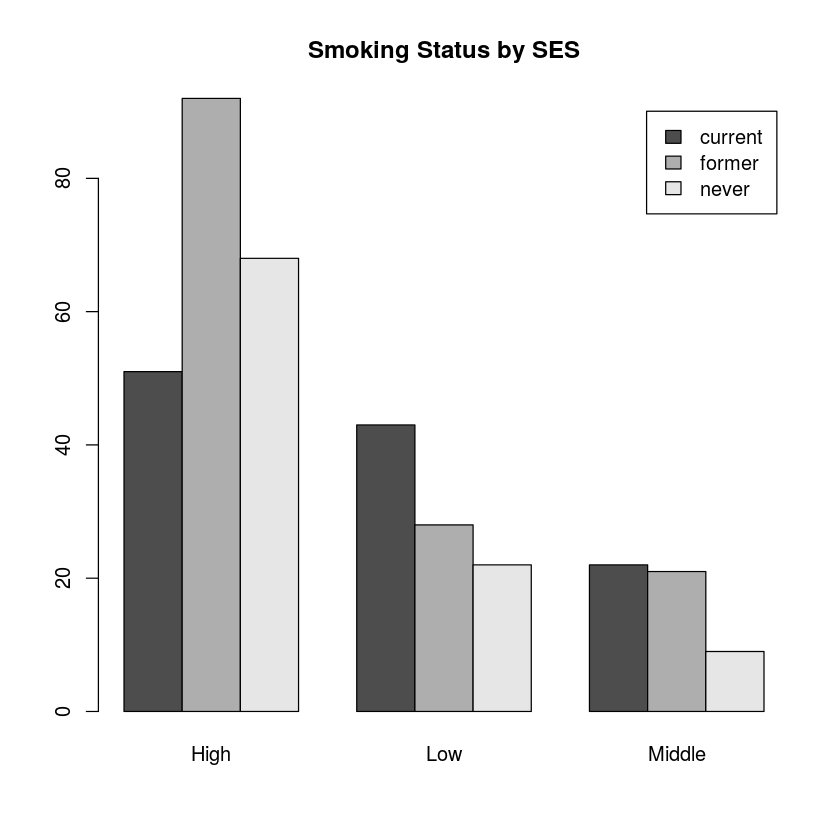

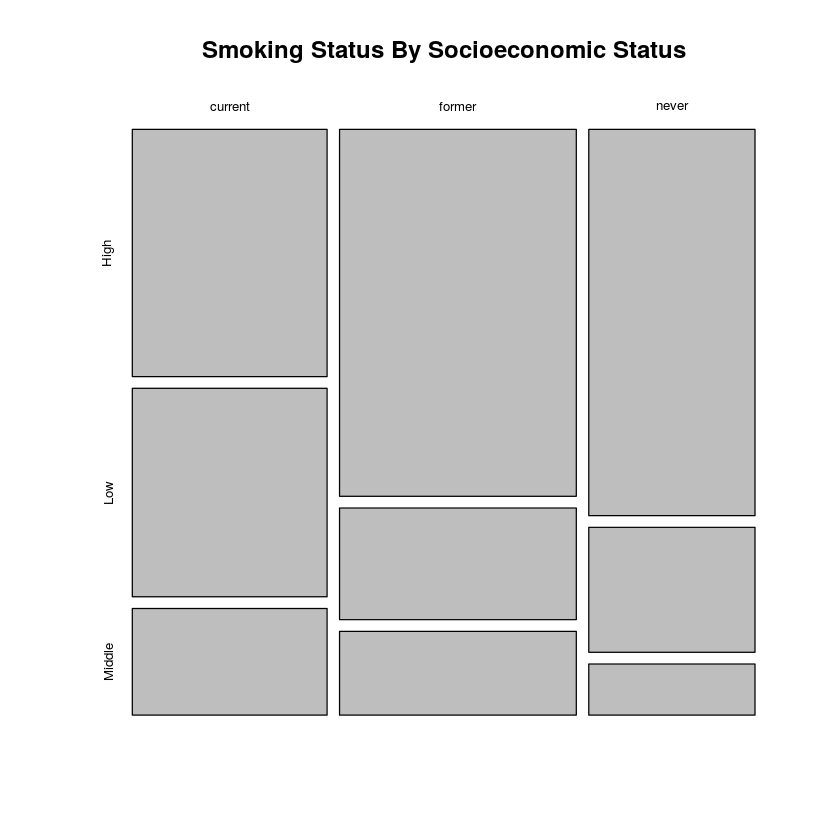

In [4]:
barplot(smoke,legend=T,beside=T,main='Smoking Status by SES')
plot(smoke,main="Smoking Status By Socioeconomic Status")

There are a number of ways to get the marginal distributions using the margin.table command. If you just give the command the table it calculates the total number of observations. You can also calculate the marginal distributions across the rows or columns based on the one optional argument:

In [5]:
margin.table(smoke)
margin.table(smoke,1)
margin.table(smoke,2)

[1] 356

current  former   never 
    116     141      99 

  High    Low Middle 
   211     93     52 

Combining these commands you can get the proportions:

In [6]:
smoke/margin.table(smoke)

              High        Low     Middle
current 0.14325843 0.12078652 0.06179775
former  0.25842697 0.07865169 0.05898876
never   0.19101124 0.06179775 0.02528090

In [7]:
margin.table(smoke,1)/margin.table(smoke)

  current    former     never 
0.3258427 0.3960674 0.2780899 

In [8]:
margin.table(smoke,2)/margin.table(smoke)

     High       Low    Middle 
0.5926966 0.2612360 0.1460674 

That is a little obtuse, so fortunately, there is a better way to get the proportions using the prop.table command. You can specify the proportions with respect to the different marginal distributions using the optional argument:

In [9]:
prop.table(smoke)

              High        Low     Middle
current 0.14325843 0.12078652 0.06179775
former  0.25842697 0.07865169 0.05898876
never   0.19101124 0.06179775 0.02528090

In [10]:
prop.table(smoke,1)

              High        Low     Middle
current 0.43965517 0.37068966 0.18965517
former  0.65248227 0.19858156 0.14893617
never   0.68686869 0.22222222 0.09090909

In [11]:
prop.table(smoke,2)

             High       Low    Middle
current 0.2417062 0.4623656 0.4230769
former  0.4360190 0.3010753 0.4038462
never   0.3222749 0.2365591 0.1730769

If you want to do a chi-squared test to determine if the proportions are different, there is an easy way to do this. If we want to test at the 95% confidence level we need only look at a summary of the table:

In [12]:
summary(smoke)

Number of cases in table: 356 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 18.51, df = 4, p-value = 0.0009808

Since the p-value is less that 5% we can reject the null hypothesis at the 95% confidence level and can say that the proportions vary.

Of course, there is a hard way to do this. This is not for the faint of heart and involves some linear algebra which we will not describe. If you wish to calculate the table of expected values then you need to multiply the vectors of the margins and divide by the total number of observations:

In [13]:
expected <- as.array(margin.table(smoke,1)) %*% t(as.array(margin.table(smoke,2))) / margin.table(smoke)
expected

,High,Low,Middle
current,68.75281,30.30337,16.94382
former,83.57022,36.83427,20.59551
never,58.67697,25.86236,14.46067


(The “t” function takes the transpose of the array.)

The result in this array and can be directly compared to the existing table. We need the square of the difference between the two tables divided by the expected values. The sum of all these values is the Chi-squared statistic:

In [14]:
chi <- sum((expected - as.array(smoke))^2/expected)
chi

[1] 18.50974

We can then get the p-value for this statistic:

In [15]:
1-pchisq(chi,df=4)

[1] 0.0009808236

## Graphical Views of Tables

The plot command will automatically produce a mosaic plot if its primary argument is a table. Alternatively, you can call the mosaicplot command directly.

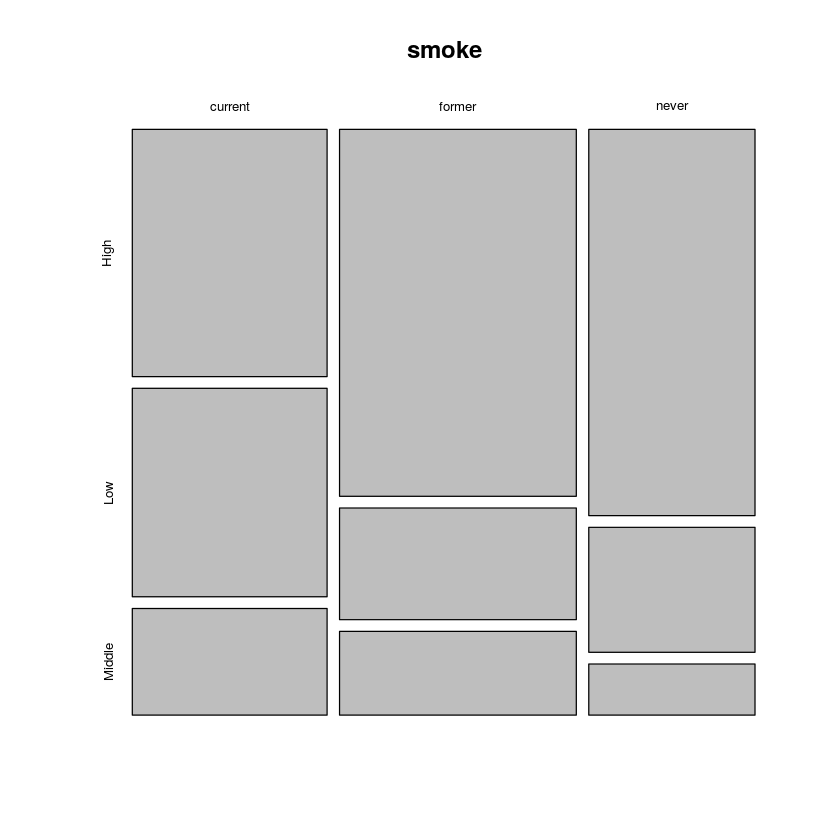

In [16]:
smokerData <- read.csv(file='smoker.csv',sep=',',header=T)
smoke <- table(smokerData$Smoke,smokerData$SES)
mosaicplot(smoke)

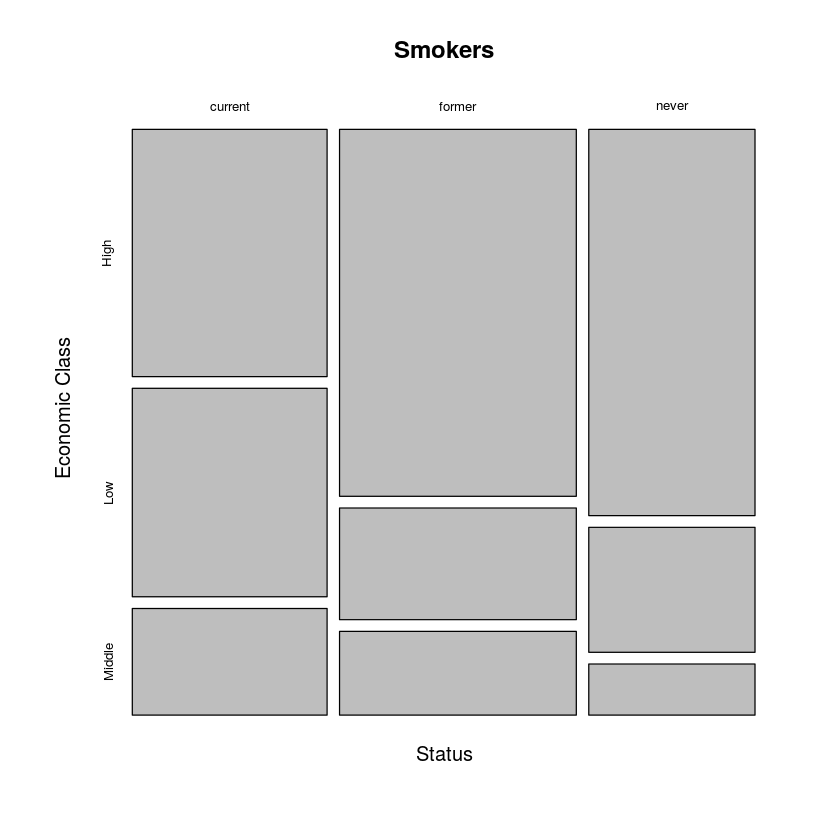

In [17]:
mosaicplot(smoke,main="Smokers",xlab="Status",ylab="Economic Class")

If you wish to switch which side (horizontal versus vertical) to determine the primary proportion then you can use the sort option. This can be used to switch whether the width or height is used for the first proportional length:

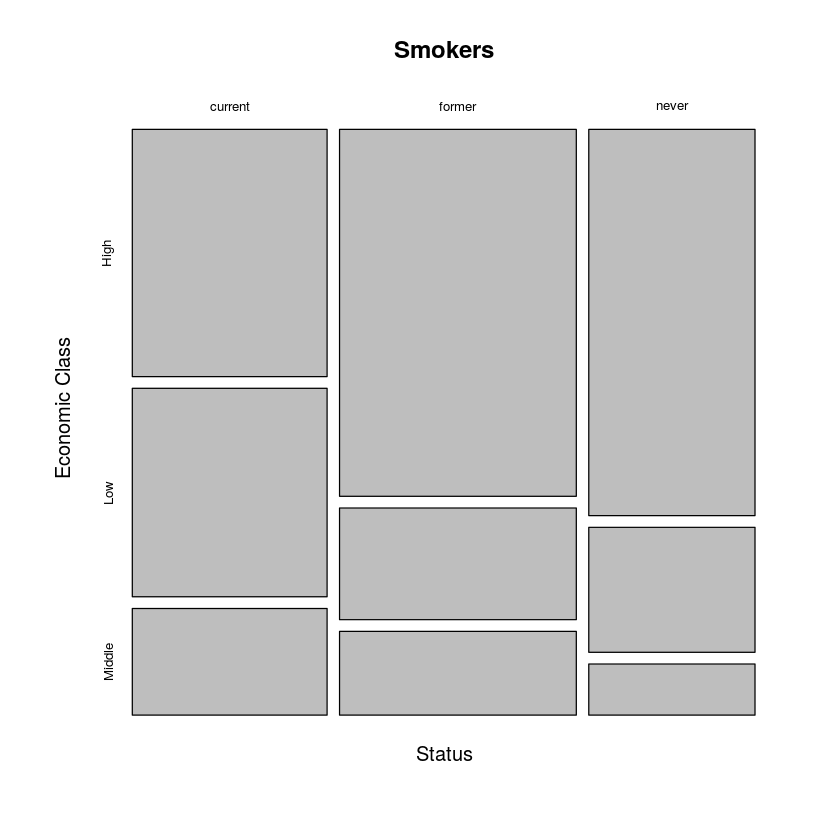

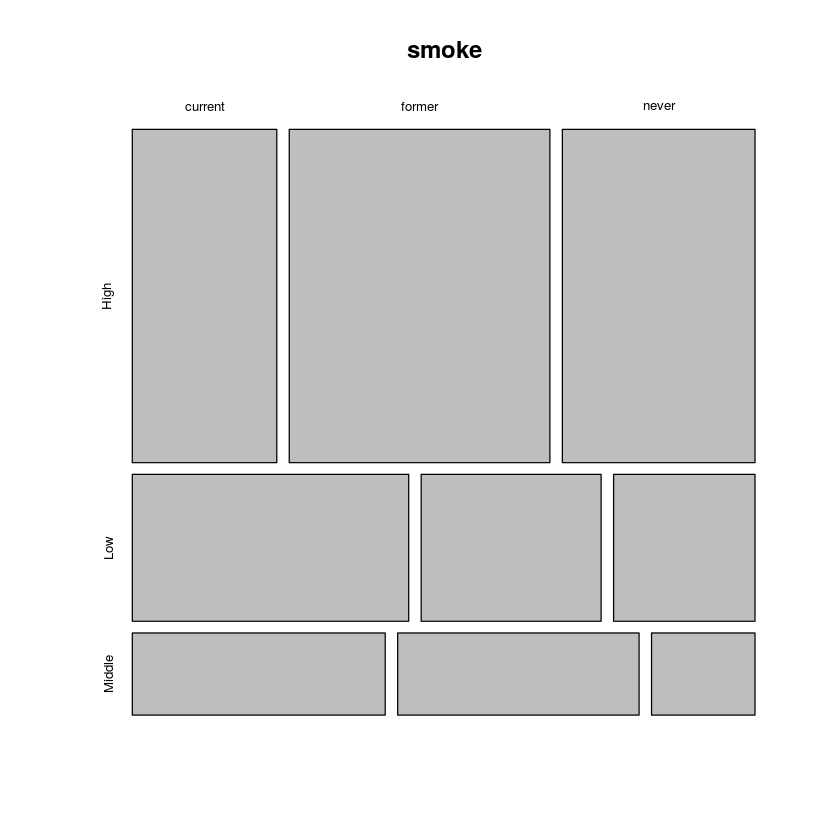

In [18]:
mosaicplot(smoke,main="Smokers",xlab="Status",ylab="Economic Class")
mosaicplot(smoke,sort=c(2,1))

Finally if you wish to switch which side is used for the vertical and horzintal axis you can use the dir option:

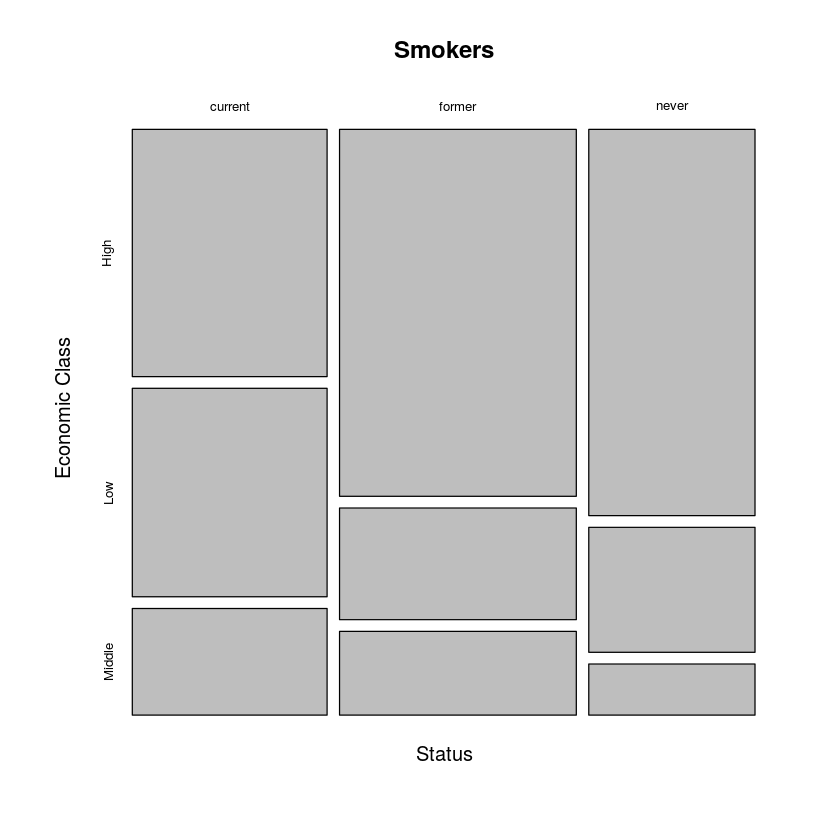

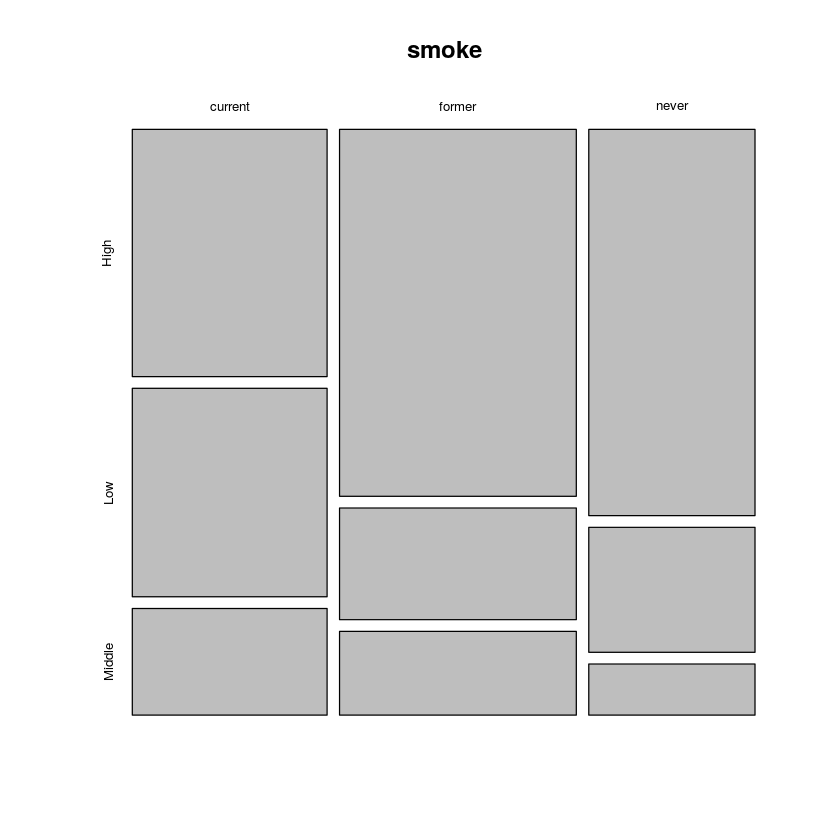

In [19]:
mosaicplot(smoke,main="Smokers",xlab="Status",ylab="Economic Class")
mosaicplot(smoke,dir=c("v","h"))